In [131]:
import scipy.io
import matplotlib.pyplot as plt
from skimage import feature, io, color
import numpy as np
from tqdm import tqdm

# 1 Dataset

In [107]:
def load_svhn_dataset(train_path, test_path):
    train_data = scipy.io.loadmat(train_path)
    test_data = scipy.io.loadmat(test_path)

    train_images = train_data['X']
    train_labels = train_data['y']
    test_images = test_data['X']
    test_labels = test_data['y']

    train_images = np.transpose(train_images, (3, 0, 1, 2))
    test_images = np.transpose(test_images, (3, 0, 1, 2))

    return train_images, train_labels, test_images, test_labels

In [108]:
# Provide the paths to SVHN train and test datasets
train_path = '/Users/louis.skowronek/PycharmProjects/pattern_recognition/train_32x32.mat'
test_path = '/Users/louis.skowronek/PycharmProjects/pattern_recognition/test_32x32.mat'

train_images, train_labels, test_images, test_labels = load_svhn_dataset(train_path, test_path)

In [109]:
# print shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (73257, 32, 32, 3)
Train labels shape: (73257, 1)
Test images shape: (26032, 32, 32, 3)
Test labels shape: (26032, 1)


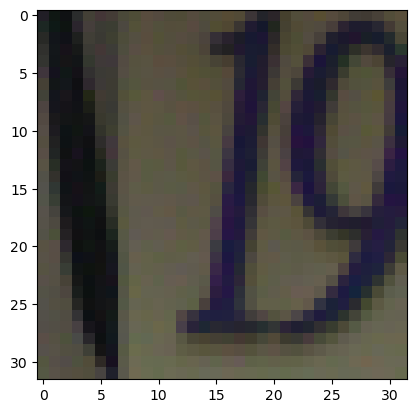

In [110]:
# show the first image
plt.imshow(train_images[0,:,:,:])
plt.show()

# 2 Feature Extraction

In [113]:
# 1. raw vectors. Concat pixels to one big vector. Very trivial
features1 = train_images.reshape(train_images.shape[0], -1)

In [116]:
features1[:,1]

array([ 30,  76,  54, ...,  78, 188, 217], dtype=uint8)

In [117]:
# 2. Local Binary Pattern

In [120]:
# Convert the image to grayscale
gray_images = np.mean(train_images, axis=3, keepdims=True)

In [122]:
#plt.imshow(gray_images[1,:,:,:], cmap='gray')
#plt.show()

In [269]:
# Preallocate the lbp_images array
lbp_images = np.empty((gray_images.shape[0], gray_images.shape[1], gray_images.shape[2], 1), dtype=np.uint8)

# create the lpb images
for i, gray_image in enumerate(tqdm(gray_images)):
    # Compute LBP features
    radius = 2
    n_points = 8 * radius
    lbp_images[i, :, :, 0] = feature.local_binary_pattern(gray_image[:, :, 0], n_points, radius, method='uniform')

100%|██████████| 73257/73257 [00:06<00:00, 11132.28it/s]


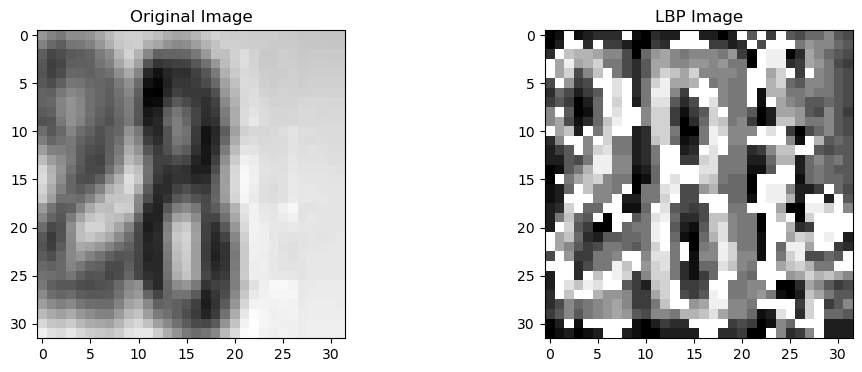

In [273]:
# Display the original image and LBP image
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(gray_images[13], cmap='gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(lbp_images[13], cmap='gray')
plt.title("LBP Image")

plt.show()

Difficulties:
what hyperparameters to choose?

In [ ]:
3.